# Dynamic Programming

## 1 - 零钱问题

给定金钱数额m，有n种面值不同的硬币，求能找零的硬币的最小数量。

In [1]:
def Change(money, coins):
    min_num = [0] + [float('inf')] * money
    for m in range(1, money + 1):
        for coin in coins:
            if m >= coin and (min_num[m - coin] + 1) < min_num[m]:
                    min_num[m] = min_num[m - coin] + 1
    return min_num[-1]

In [2]:
# test case 1
money = 6
change = [1, 3, 4]
Change(money, change)

2

- 时间复杂度：O(nm)
- 空间复杂度：O(m)

补充：如果要**展示找零结果**，就要单独用一个表格储存每个面值在进行操作前的数额。

In [3]:
def Change2(money, coins):
    min_num = [0] + [float('inf')] * money
    prev = [0] * (money + 1)
    for m in range(1, money + 1):
        for coin in coins:
            if m >= coin:
                num_coins = min_num[m - coin] + 1
                if num_coins < min_num[m]:
                    min_num[m] = num_coins
                    prev[m] = m - coin
    
    # 展示找零结果
    sequence = []
    while m > 0:
        sequence.append(m - prev[m])
        m = prev[m]
    return min_num[-1], sequence

In [4]:
# test case
Change2(6, [1, 3, 4])

(2, [3, 3])

类似的问题：**计算器问题**

一个计算器只能做×2，×3，+1三种操作。给定一个整数n，要用该计算器将1经操作变换到n，求所需的最少操作数，并展示所有的中间数字。例如，得到5最少需要3个操作，中间经历的数字可以为[1, 2, 4, 5], 也可以为[1, 3, 4, 5]。

In [5]:
def MinOperations(n):
    min_num = [0] * (n + 1)
    prev = [1] * (n + 1)
    for i in range(2, n + 1):
        tmp = min_num[i - 1]
        prev[i] = i - 1
        if i % 2 == 0 and min_num[i // 2] < tmp:
            tmp = min_num[i // 2]
            prev[i] = i // 2
        if i % 3 == 0 and min_num[i // 3] < tmp:
            tmp = min_num[i // 3]
            prev[i] = i // 3
        min_num[i] = tmp + 1
    
    # uncover the solution
    sequence = [i]
    while i > 1:
        i = prev[i]
        sequence.append(i)
        
    return min_num[-1], sequence[::-1]

In [6]:
# test case
MinOperations(5)

(3, [1, 3, 4, 5])

## 2 - 编辑距离 (Edit Distance)

- 编辑距离：把一个字符串A转换为字符串B所需要的最少的**单字符编辑操作**次数。
- 编辑距离越大，两个字符串的相似程度就越小。

**单字符编辑操作有三种**：

- 插入（Insertion）：往A中插入一个字符
- 删除（Deletion）：在B中插入一个占位符（相当于删除A中的一个字符）
- 替换（Substitution）：替换A中的字符。

$D(i, j)$：A的前$i$个字符和B的前$j$个字符之间的编辑距离。要求A和B的编辑距离，就是要求D(|A|, |B|)。

递推公式：

$$D(i, j)=min
\begin{cases}
D(i - 1, j) + 1& \\
D(i, j - 1) + 1& \\
D(i - 1, j - 1) + 1& \text{A[i] != B[j]}\\
D(i - 1, j - 1)& \text{A[i] == B[j]}\\
\end{cases}$$

其中：

- D(i - 1, j)表示删除字符A[i]（插入占位符B[j]）
- D(i, j - 1)表示插入字符A[i]
- D(i - 1, j - 1)表示替换A[i]

In [7]:
def EditDistance(A, B):
    D = [[0] * (len(B) + 1) for _ in range(len(A) + 1)]
    for i in range(len(A) + 1):
        D[i][0] = i
    for j in range(len(B) + 1):
        D[0][j] = j
    for j in range(1, len(B) + 1):
        for i in range(1, len(A) + 1):
            insertion = D[i][j - 1] + 1
            deletion = D[i - 1][j] + 1
            if A[i - 1] == B[j - 1]:
                substitution = D[i - 1][j - 1]
            else:
                substitution = D[i - 1][j - 1] + 1
            D[i][j] = min(insertion, deletion, substitution)
    return D[-1][-1]

In [8]:
A = 'kitten'
B = 'sitting'
EditDistance(A, B)

3

- 时间复杂度：O(nm)
- 空间复杂度：O(nm)

## 3 - 最长公共子序列 (Longest common subsequence)

首先区分一下子序列和子串：

- 子序列 (subsequence)：序列的部分项按原有的顺序而组成的序列，这些项可以不连续。比如，acf是abcdf的子序列。
- 子串 (substring)：序列中一段连续的项组成的序列。比如，abcdf的子串可以是abc，cdf，但不能是acf。

递推公式：

$$LCS(i, j)=
\begin{cases}
0& \text{if i = 0 or j = 0} \\
LCS(i - 1, j - 1) + 1& \text{if i, j > 0 and A[i] == B[j]}\\
max(LCS(i, j - 1), LCS(i - 1, j))& \text{if i, j > 0 and A[i] != B[j]}\\
\end{cases}$$

In [9]:
def LCS(a, b):
    lcs = [[0] * (len(b) + 1) for _ in range(len(a) + 1)]
    for i in range(1, len(a) + 1):
        for j in range(1, len(b) + 1):
            if a[i - 1] == b[j - 1]:
                lcs[i][j] = lcs[i - 1][j - 1] + 1
            else:
                lcs[i][j] = max(lcs[i - 1][j], lcs[i][j - 1])
    return lcs[-1][-1]

In [10]:
# test case
a = '433'
b = '1524'
print('Longest common substring:', LCS(a, b))
print('Edit distance:',EditDistance(a, b))

Longest common substring: 1
Edit distance: 4


## 4 - 背包问题

背包问题分类：

<img src="images/knapsack.png" style="height:100px;">

### 4.1 - 完全背包问题

物品重量为[w1, w2, ..., wn], 价值为[v1, v2, ..., vn]，背包最大承重量为W。物品可无限取用，求背包能容纳物品的最大价值。

递推公式：

<img src="images/knapsack2.png" style="height:70px;">

In [11]:
def KnapsackWithRepetitions(capacity, weights, values):
    max_val = [0] * (capacity + 1)
    for w in range(1, capacity + 1):
        for i in range(len(weights)):
            if weights[i] <= w:
                max_val[w] = max(max_val[w - weights[i]] + values[i], max_val[w])
    
    return max_val[-1]

In [12]:
# test case
weights = [6, 3, 4, 2]
values = [30, 14, 16, 9]
KnapsackWithRepetitions(10, weights, values)

48

- 时间复杂度：O(nW)
- 空间复杂度：O(W)

### 3.2 - 0/1背包问题

物品重量为[w1, w2, ..., wn], 价值为[v1, v2, ..., vn]，背包最大承重量为W。物品数量均只有一个，求背包能容纳物品的最大价值。

递推公式：
			
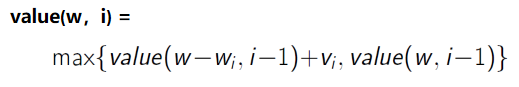

In [13]:
def KnapsackWithoutRepetitions(capacity, weights, values):
    res = [[0] * (len(weights) + 1) for _ in range(capacity + 1)]
    for i in range(1, len(weights) + 1):
        for w in range(1, capacity + 1):
            res[w][i] = res[w][i - 1]
            if weights[i - 1] <= w:
                tmp = res[w - weights[i - 1]][i - 1] + values[i - 1]
                if tmp > res[w][i]:
                    res[w][i] = tmp
    return res[-1][-1]

In [14]:
# test case
weights = [6, 3, 4, 2]
values = [30, 14, 16, 9]
KnapsackWithoutRepetitions(10, weights, values)

46

- 时间复杂度： O(nW)
- 空间复杂度： O(nW)

追溯获得最大价值时背包里装的东西：

In [15]:
def KnapsackWithoutRepetitions2(capacity, weights, values):
    max_val = [[0] * (len(weights) + 1) for _ in range(capacity + 1)]
    for i in range(1, len(weights) + 1):
        for w in range(1, capacity + 1):
            max_val[w][i] = max_val[w][i - 1]
            if weights[i - 1] <= w:
                tmp = max_val[w - weights[i - 1]][i - 1] + values[i - 1]
                if tmp > max_val[w][i]:
                    max_val[w][i] = tmp

    optimal_solution = [0] * (len(weights) + 1)
    while w > 0 and i > 0:
        if max_val[w][i] == max_val[w - weights[i - 1]][i - 1] + values[i - 1]:
            optimal_solution[i] = 1
            w = w - weights[i - 1]
        i -= 1
            
    return max_val[-1][-1], optimal_solution

In [16]:
# test case 2
weights = [6, 3, 4, 2]
values = [30, 14, 16, 9]
KnapsackWithoutRepetitions2(10, weights, values)

(46, [0, 1, 0, 1, 0])

如果不需要追溯背包问题的最优解，则可以**将二维背包简化为一维背包**。

原因：每次计算value[w][i]都只用得上两个值：value[w - wi][i - 1], value[w][i - 1]。这两个值都位于表格的第(i - 1)列，因此我们可以把res压缩为一维的、有(W + 1)个格子的列表，每次迭代直接在该列表上更新，最后输出的结果即为列表最后一个格子里的值。

In [23]:
def OneDKnacpsack(capacity, weights, values):
    res = [0] * (capacity + 1)
    for i in range(len(weights)):
        for w in range(capacity, weights[i] - 1, -1):
            res[w] = max(res[w - weights[i]] + values[i], res[w])
    return res[-1]

In [24]:
# test case 
weights = [6, 3, 4, 2]
values = [30, 14, 16, 9]
OneDKnacpsack(10, weights, values)

46